<a href="https://colab.research.google.com/github/Robel-w/AI-ML_GDG/blob/main/ride-price-ml%20/notebook/ride_price_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Data

In [2]:
import pandas as pd
df = pd.read_csv('/content/rides.csv')
df.head()

,distance_km,duration_min,time_of_day,traffic_level,weather,demand_level,day_type,ride_price
0,2,8,Morning,Low,Clear,Low,Weekday,40
1,5,18,Afternoon,Medium,Clear,Medium,Weekday,85
2,7,22,Evening,High,Cloudy,High,Weekend,160
3,3,10,Night,Low,Clear,Medium,Weekday,65
4,10,35,Evening,High,Rainy,High,Weekend,240


Check Problems

In [5]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance_km    159 non-null    int64 
 1   duration_min   159 non-null    int64 
 2   time_of_day    159 non-null    object
 3   traffic_level  159 non-null    object
 4   weather        159 non-null    object
 5   demand_level   159 non-null    object
 6   day_type       159 non-null    object
 7   ride_price     159 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 10.1+ KB


,distance_km,duration_min,ride_price
count,159.000000,159.000000,159.000000
mean,6.308176,22.383648,145.459119
std,3.276208,11.738069,88.307342
min,1.000000,4.000000,18.000000
25%,3.500000,12.500000,72.500000
50%,6.000000,21.000000,112.000000
75%,9.000000,33.000000,237.000000
max,13.000000,46.000000,310.000000


Visualizaiton

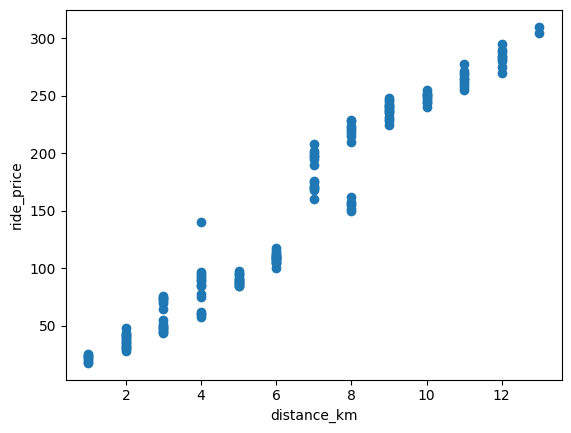

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df["distance_km"], df["ride_price"])
plt.xlabel("distance_km")
plt.ylabel("ride_price")
plt.show()

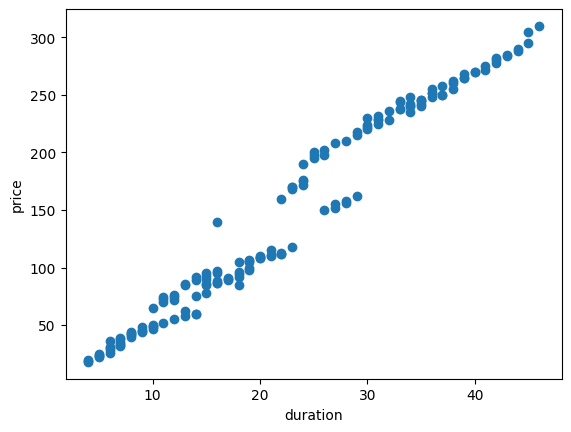

In [8]:
plt.scatter(df["duration_min"], df["ride_price"])
plt.xlabel("duration")
plt.ylabel("price")
plt.show()

Data Cleaning & Feature Engineering

In [9]:
df.fillna(df.mean(numeric_only=True), inplace=True)
#it handels missing values

In [10]:
df = pd.get_dummies(df, drop_first=True)
# to encode categorical features

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['distance_km','duration_min']] = scaler.fit_transform(df[['distance_km','duration_min']])
# to scale numeric features

In [14]:
df = df[df['ride_price'] < df['ride_price'].quantile(0.95)]
#outlier ditection

Regression Model

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop("ride_price", axis=1)
y = df["ride_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Split data

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Train model

LinearRegression()

In [19]:
from sklearn.metrics import mean_absolute_error
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)
#pridict and evaluate


3.4778047494782935

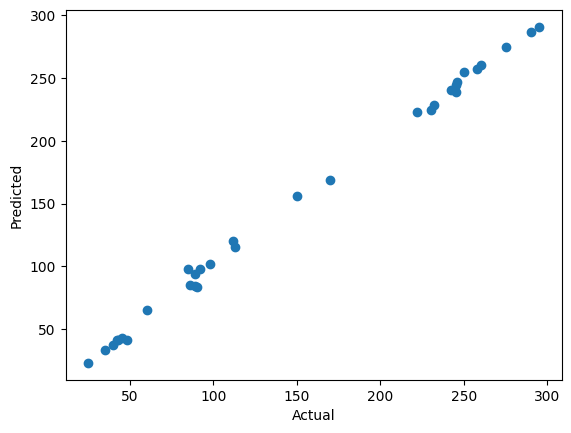

In [20]:
plt.scatter(y_test, pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
#ploting actual vs predicted to se if it is accurate

Classification Model

In [24]:
df["high_cost"] = (df["ride_price"] > df["ride_price"].median()).astype(int)
# if the price is higher than the median price we take it as a high cost
# so here we are creating a binary target

In [23]:
from sklearn.linear_model import LogisticRegression
X = df.drop(["ride_price","high_cost"], axis=1)
y = df["high_cost"]
# training the logistic regression

In [26]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

# here also training the logistic regression

LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix
preds = clf.predict(X_test)
accuracy_score(y_test, preds)
confusion_matrix(y_test, preds)
# and we evaluate it here

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])